# K-nearest neighbor algorithm

In [3]:
from google.colab import drive
drive = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Deeplearning_pytorch_Textbook/chap03

/content/drive/MyDrive/Colab Notebooks/Deeplearning_pytorch_Textbook/chap03


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ['sepal-length', 'sepal-width','petal-length','petal_width','Class']
dataset = pd.read_csv('./data/iris.data', names=names)


In [8]:
dataset

,sepal-length,sepal-width,petal-length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
print(len(X_train), len(X_test))

120 30


In [19]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50) # k = 50으로 설정
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [21]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test,y_pred)))

정확도: 0.9


In [26]:
#최적의 k값 찾기
best_accuracy = 0
for k in range(1, 50, 1):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  if accuracy > best_accuracy:
    best_k = k
    best_accuracy = accuracy

print(best_k, best_accuracy)

10 1.0


# Support Vector Machine

In [44]:
from sklearn import svm as SVM
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [41]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data,
                                                                    iris.target,
                                                                    test_size = 0.6,
                                                                    random_state = 42)

In [48]:
svm = SVM.SVC(kernel='linear', C = 1.0, gamma = 0.5)#선형 분류기(고차원으로 매핑하지 X), C는 클 수록 hard margin, 작을수록 soft margin(어느정도의 이상치 허용)
#gamma는 결정경계면을 얼마나 continuous 하게 가져갈지 결정. 감마값이 높을 수록 overfitting의 위험이 크고 곡선의 형태를 띈다.
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print(score)

0.9888888888888889


# CART Decision Tree

In [50]:
import pandas as pd
df = pd.read_csv('./data/titanic/train.csv', index_col = 'PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [51]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) #이렇게도 binary 할당 가능하구나.
df = df.dropna()
X = df.drop('Survived', axis = 1)
y = df['Survived']


<ipython-input-53-a5cce25d26b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) #이렇게도 binary 할당 가능하구나.


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [55]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [56]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8324022346368715

In [58]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns = ['Predicted Not Survival','Predicted Survival'],
    index = ['True Not Survival','True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,15,52


# Logistic Regression

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape", digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [62]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [60]:
import numpy as np
import matplotlib.pyplot as plt

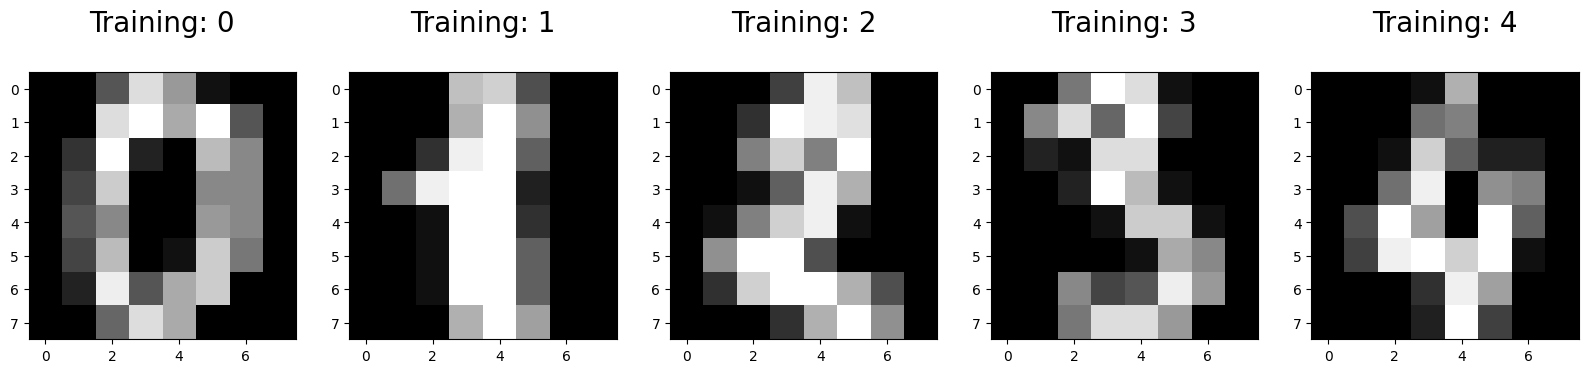

In [61]:
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5, index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
logreg.predict(X_test[0].reshape(1,-1))

array([2])

In [70]:
logreg.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [71]:
predictions = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print(score)

0.9511111111111111


In [73]:
import seaborn as sns

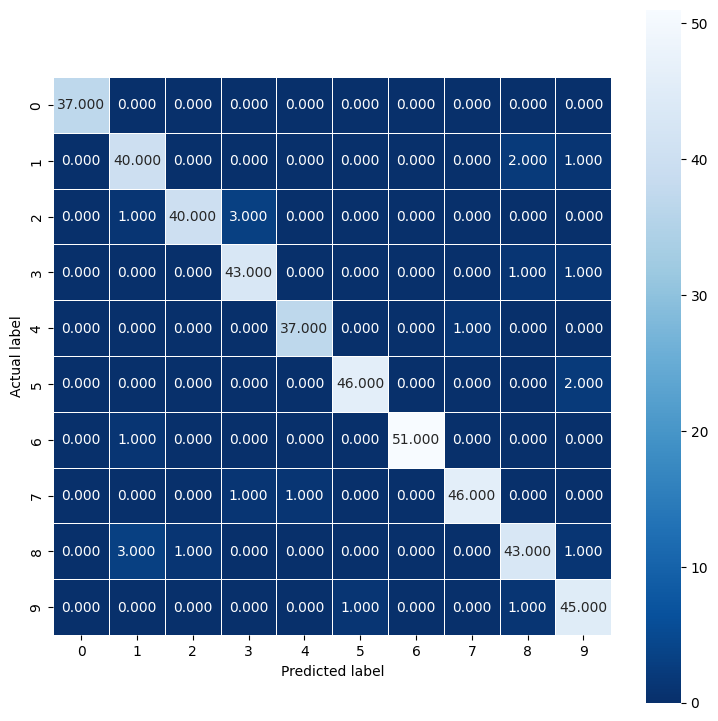

In [74]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt  = '.3f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)

# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
dataset = pd.read_csv('./data/weather.csv')

In [77]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


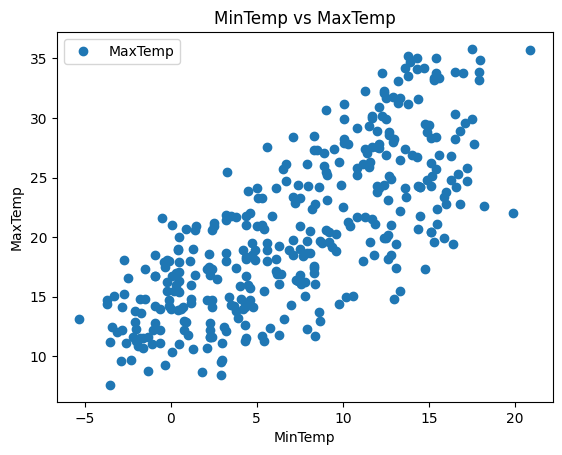

In [78]:
dataset.plot(x = 'MinTemp',y = 'MaxTemp', style = 'o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [79]:
X = dataset['MinTemp'].values.reshape(-1,1) #1열로 만듬
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Pred': y_pred.flatten()})
df

,Actual,Pred
0,27.6,24.033818
1,34.2,25.575971
2,34.2,26.468796
3,34.9,29.147272
4,11.6,16.404221
...,...,...
69,16.9,19.732024
70,24.2,21.517675
71,11.6,16.404221
72,16.0,15.511396


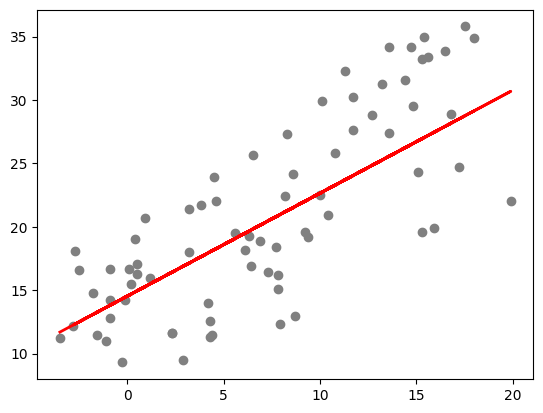

In [86]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color ='red', linewidth =2)
plt.show()

In [87]:
print(metrics.mean_squared_error(y_test,y_pred))

22.775352179923875


# K means clustering

In [88]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv('./data/sales data.csv')

In [90]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [91]:
categorical_features = ['Channel','Region']
continous_features = [i for i in list(data.columns) if i not in categorical_features]
print(continous_features)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [92]:
for col in categorical_features:
  dummies = pd.get_dummies(data[col], prefix = col)
  data = pd.concat([data, dummies], axis = 1)
  data = data.drop(col, axis = 1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [93]:
mms =MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [96]:
data_transformed[0] #minmax scaler를 쓰면 이진형 변수는 그대로 감. 꼭 나중에 써먹자

array([0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
       0.02784731, 0.        , 1.        , 0.        , 0.        ,
       1.        ])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

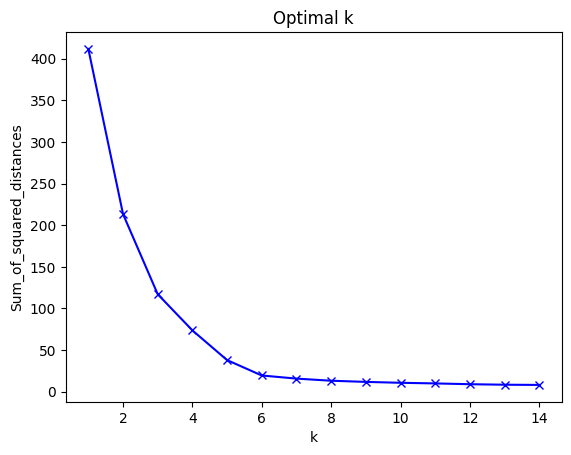

In [98]:
Sum_of_squared_distances = []
K =range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances') #x, y 두데이터의 차의 제곱합. 군집 수가 많아질 수록 0으로 감.
plt.title('Optimal k')
plt.show()

k = 5가 가장 적절함. elbow point

# DBSCAN and Principle component analysis

In [99]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [100]:
X = pd.read_csv('./data/credit card.csv')
X = X.drop('CUST_ID', axis =1)
X.fillna(method='ffill', inplace = True)#forward fill가능하게 하는 함수 나중에 쓰자.
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2)#2차원으로 축소
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544828
2  0.330633  0.268878
3 -0.481657 -0.097608
4 -0.563512 -0.482506


In [107]:
X_principal

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544828
2,0.330633,0.268878
3,-0.481657,-0.097608
4,-0.563512,-0.482506
...,...,...
8945,0.328693,-0.198293
8946,0.259752,-0.176867
8947,0.188818,-0.248155
8948,-0.313093,-0.171112


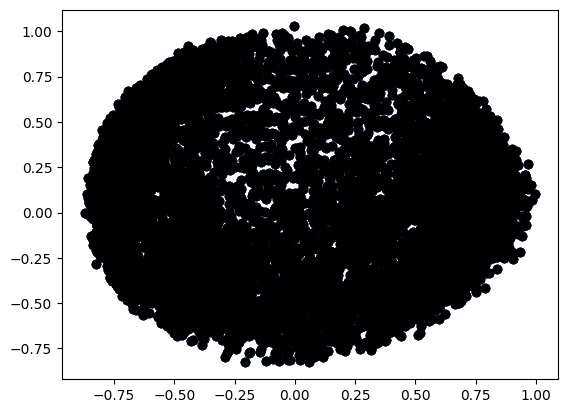

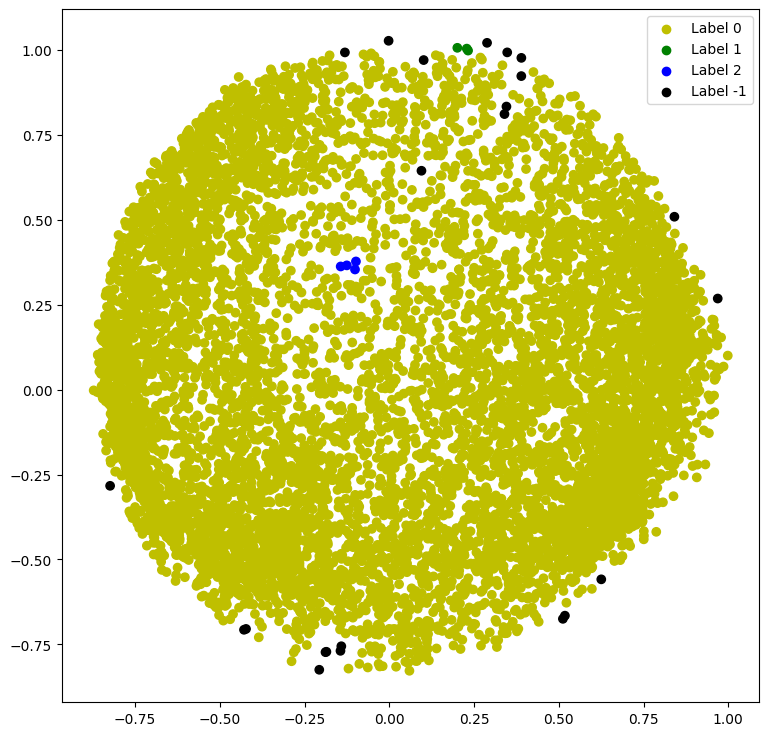

In [108]:
db_default = DBSCAN(eps = 0.0375, min_samples=3).fit(X_principal) #epsilon neighborhood 거리 지정
labels = db_default.labels_

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'k');

plt.figure(figsize = (9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r,g,b,k), ('Label 0', 'Label 1','Label 2','Label -1'))
plt.show()

죄다 label 0이됨.

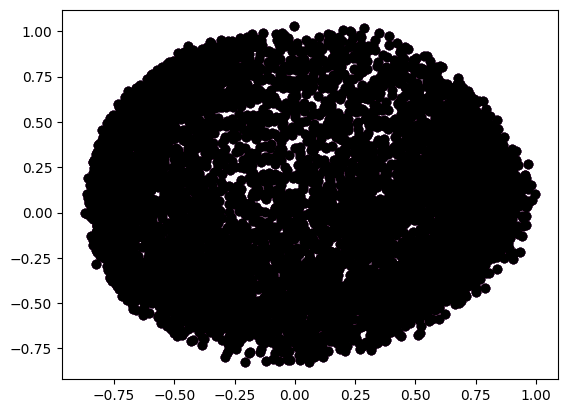

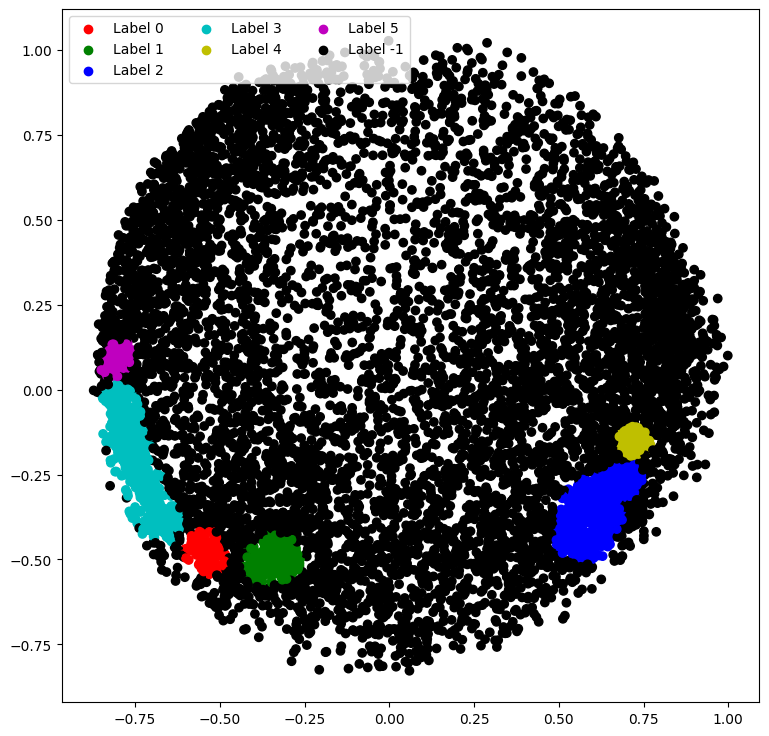

In [110]:
db = DBSCAN(eps = 0.0375, min_samples=50).fit(X_principal) #minsamples 50으로 -> centroid 지정 더 깐깐하게
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r','g','b','c','y','m','k']

r = plt.scatter(X_principal['P1'], X_principal['P2'],marker = 'o', color = colors1[0]);
g = plt.scatter(X_principal['P1'], X_principal['P2'],marker = 'o', color = colors1[1]);
b = plt.scatter(X_principal['P1'], X_principal['P2'],marker = 'o', color = colors1[2]);
c = plt.scatter(X_principal['P1'], X_principal['P2'],marker = 'o', color = colors1[3]);
y = plt.scatter(X_principal['P1'], X_principal['P2'],marker = 'o', color = colors1[4]);
m = plt.scatter(X_principal['P1'], X_principal['P2'],marker = 'o', color = colors1[5]);
k = plt.scatter(X_principal['P1'], X_principal['P2'],marker = 'o', color = colors1[6]);

plt.figure(figsize = (9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r,g,b,c,y,m,k), ('Label 0', 'Label 1','Label 2','Label 3','Label 4','Label 5','Label -1'),scatterpoints =1, loc = 'upper left',ncol =3)
plt.show()

조금더 다양하게 분류 되긴 하였으나 대부분 -1로 매핑.